# Juntando R y Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

In [2]:
rpy2.robjects.numpy2ri.activate()

In [3]:
codigo_r = """
saludar = function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [4]:
ro.r(codigo_r)

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x000001A6F6584680> [RTYPES.CLOSXP]
R classes: ('function',)

In [5]:
saludar_py = ro.globalenv["saludar"]

In [6]:
res = saludar_py("Antonio")
res[0]

'Hola,  Antonio'

In [7]:
type(res)

rpy2.robjects.vectors.StrVector

In [8]:
type(res[0])

str

In [9]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [10]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [11]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [12]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [13]:
ro.globalenv["var_to_r"] = var_from_python

In [14]:
ro.r("var_to_r")

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [15]:
ro.r("sum(var_to_r)")

118.000000


In [16]:
ro.r("mean(var_to_r)")

2.950000


In [17]:
ro.r("sd(var_to_r)")

1.169045


In [18]:
np.sum(var_from_python)

118.00000000000007

In [19]:
np.mean(var_from_python)

2.950000000000002

In [20]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [21]:
#ro.r("hist(var_to_r)") # Mejor utilizar plt.hist ya que se cuelga la función hist de r en python

# Trabajar de forma conjunta entre R y Python

In [22]:
#ro.r("install.packages('extRemes')")
extremes = importr("extRemes") # library(extRemes)

In [23]:
fevd = extremes.fevd

In [24]:
print(fevd.__doc__)

Wrapper around an R function.

The docstring below is built from the R documentation.

description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x000001A6F69EF200> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

Args:
   x :  'fevd': 'x' can be a numeric vector, the name of

In [25]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                   sep = "\s+", skiprows = 1, parse_dates = [[0,1]],
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

In [26]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [27]:
data.shape

(275352, 1)

In [28]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [29]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='date_time'>

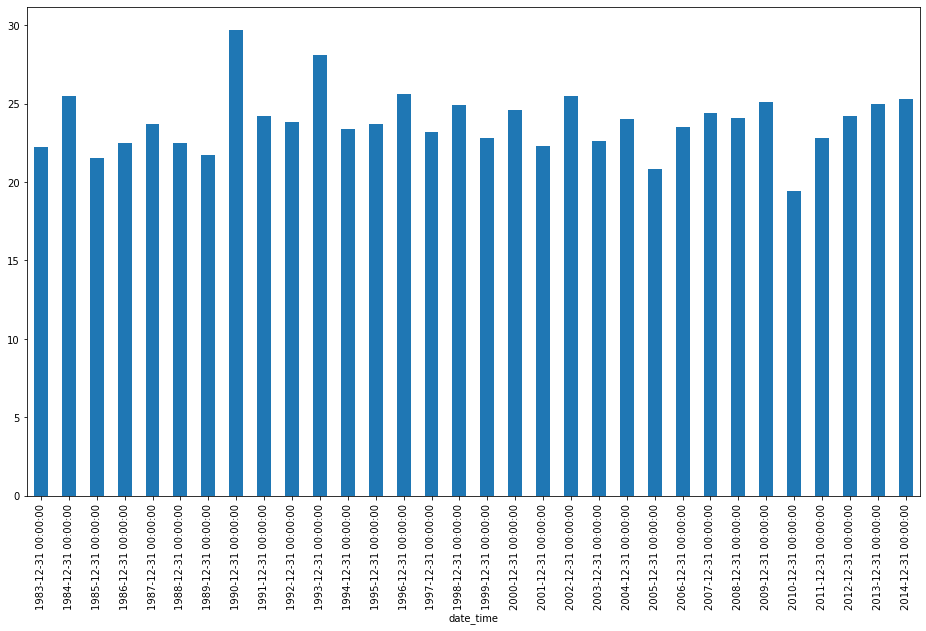

In [30]:
max_ws.plot(kind="bar",figsize=(16,9))

In [31]:
result = fevd(max_ws.values,type="GEV",method="GMLE")

In [32]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [33]:
result.r_repr

<bound method RObjectMixin.r_repr of <rpy2.robjects.vectors.ListVector object at 0x000001A6FC8D6240> [RTYPES.VECSXP]
R classes: ('fevd',)
[LangSexpV..., StrSexpVe..., FloatSexp..., BoolSexpV..., ..., StrSexpVe..., StrSexpVe..., ListSexpV..., ListSexpV...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  )
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x000001A680355180> [RTYPES.STRSXP]
R classes: ('character',)
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x000001A680355300> [RTYPES.REALSXP]
R classes: ('numeric',)
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.BoolArray'>
  <rpy2.robjects.vectors.BoolArray object at 0x000001A6803554C0> [RTYPES.LGLSXP]
R classes: ('array',)
[       0,        0,        0,        0, ...,      

In [34]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



In [35]:
res = result.rx("results")

In [36]:
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





In [37]:
loc, scale, shape = res[0].rx("par")[0]

In [38]:
loc

23.063941519915588

In [39]:
scale

1.7576912874286317

In [40]:
shape

-0.1628816367714792

# Función mágica para R

In [41]:
%load_ext rpy2.ipython

C:\Users\msantamaria\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [42]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R R

In [43]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [44]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



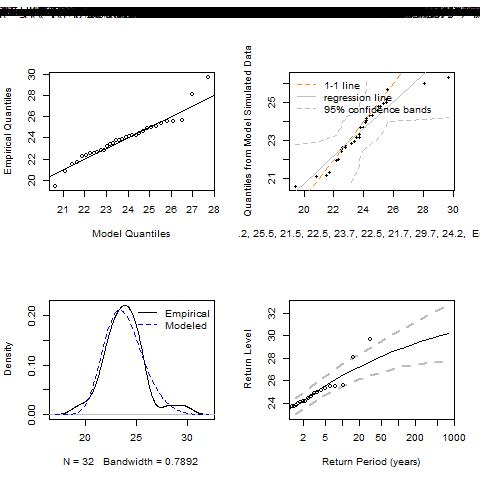

In [45]:
%R -i result plot.fevd(result)

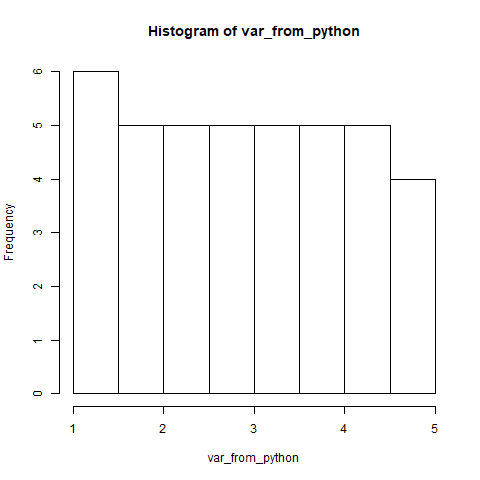

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [46]:
%R -i var_from_python hist(var_from_python)

In [47]:
ro.globalenv["result1"] = result
#ro.r("plot.fevd(result)") # puede dar error y generar un objeto rpy2.rinterface.NULL

# Un ejemplo complejo de R, Python y Rmagic

In [52]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"]

Tipo de Ajuste: GEV
Método del Ajuste: MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      28        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





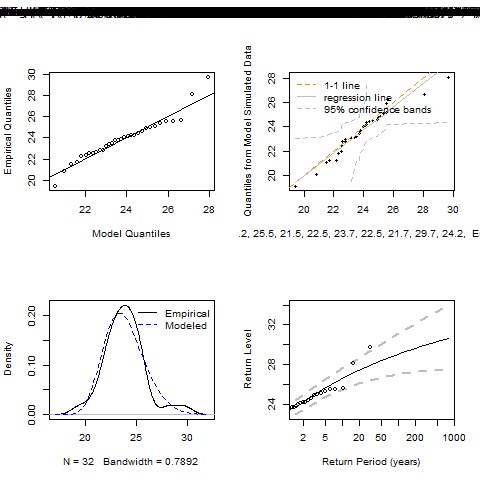

Tipo de Ajuste: GEV
Método del Ajuste: GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





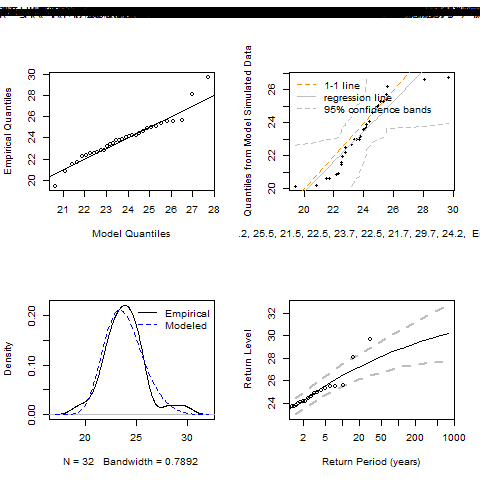

Tipo de Ajuste: GEV
Método del Ajuste: Bayesian
         location log.scale         shape new
    [1,] 23.06394 0.5640012 -1.628816e-01   0
    [2,] 23.00031 0.5290527 -1.627807e-01   3
    [3,] 23.11048 0.6480405 -4.793682e-03   3
    [4,] 23.05791 0.4985610  1.756250e-02   3
    [5,] 23.06052 0.4985610  1.756250e-02   1
    [6,] 23.05699 0.4397538  2.207324e-02   2
    [7,] 22.87399 0.4172550  2.097347e-02   2
    [8,] 23.06106 0.5267976  1.504492e-02   3
    [9,] 23.00438 0.6339970  1.504492e-02   2
   [10,] 23.04657 0.6339970  1.504492e-02   1
   [11,] 23.16262 0.7213522 -1.953210e-01   3
   [12,] 23.14520 0.7213522 -1.953210e-01   1
   [13,] 23.39954 0.8104545 -2.674798e-01   1
   [14,] 23.39954 0.8104545 -2.068049e-01   1
   [15,] 23.39954 0.8104545 -2.068049e-01   0
   [16,] 23.34253 0.7921733 -2.663444e-01   3
   [17,] 23.34253 0.7921733 -2.663444e-01   0
   [18,] 23.49598 0.7751499 -2.947637e-01   3
   [19,] 23.57036 0.8846079 -2.508287e-01   2
   [20,] 23.67584 0.8846079 -2.5

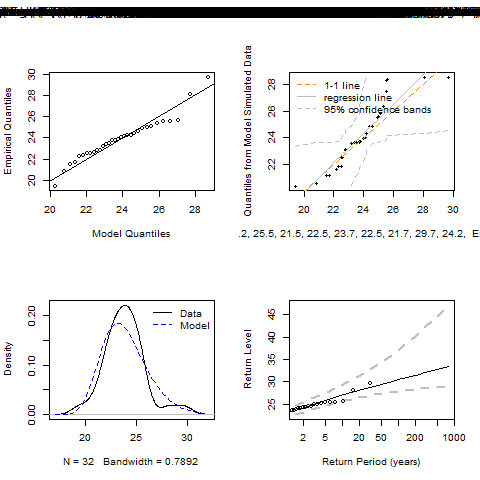

Tipo de Ajuste: GEV
Método del Ajuste: Lmoments
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 



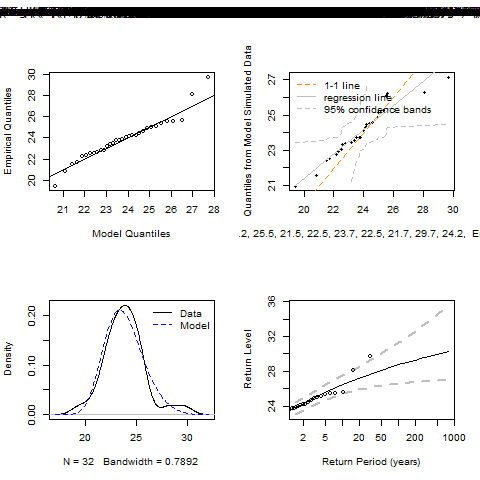

Tipo de Ajuste: Gumbel
Método del Ajuste: MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





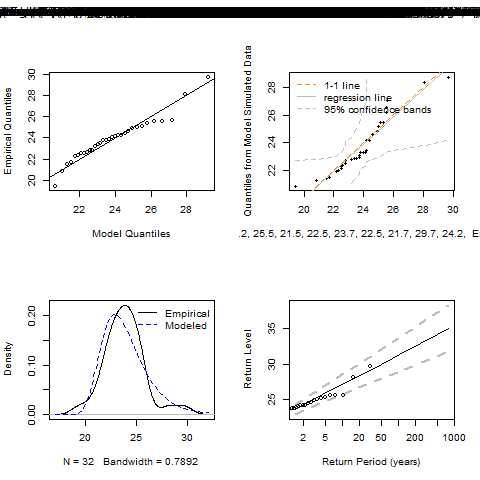

Tipo de Ajuste: Gumbel
Método del Ajuste: GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





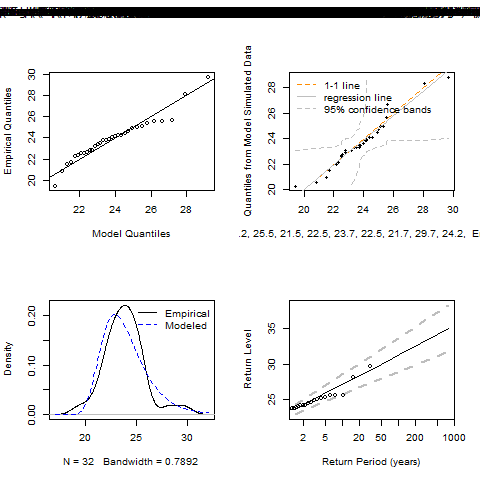

R[write to console]: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  :
R[write to console]: 
 
R[write to console]:  fevd: Using method MLE.  No default for specified arguments.



Tipo de Ajuste: Gumbel
Método del Ajuste: Bayesian


RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  number of items to replace is not a multiple of replacement length


In [53]:
for t in tipos:
    for m in metodos:
        print(f"Tipo de Ajuste: {t}")
        print(f"Método del Ajuste: {m}")
        result = fevd(max_ws.values, method=m, type=t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)